<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/Joseph_Shirk_LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-23 13:36:03--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  64.3MB/s    in 3.0s    

2019-09-23 13:36:06 (64.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [6]:
top_10 = ['Banana',
    'Bag of Organic Bananas',
    'Organic Strawberries',
    'Organic Baby Spinach',
    'Organic Hass Avocado',
    'Organic Avocado',
    'Large Lemon',
    'Strawberries',
    'Limes',
    'Organic Whole Milk']
print(top_10)

['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

In [8]:
order_products__prior.shape,order_products__train.shape

((32434489, 4), (1384617, 4))

Need:
order_products JOIN/MERGE
- order id
- product id
- add to cart order (sequence)

products
- product id
- product name

In [0]:

products = pd.read_csv('products.csv')

In [10]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape 

(33819106, 4)

In [0]:
assert len(order_products) == len(order_products__prior) +len(order_products__train)

In [12]:
top_10

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

In [13]:
products[products['product_name'].isin(top_10)]

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [14]:
products[products['product_name'].isin(top_10)] == True

,product_id,product_name,aisle_id,department_id
13175,False,False,False,False
16796,False,False,False,False
21136,False,False,False,False
21902,False,False,False,False
24851,False,False,False,False
26208,False,False,False,False
27844,False,False,False,False
47208,False,False,False,False
47625,False,False,False,False
47765,False,False,False,False


In [15]:
products_top_10 = (products[products['product_name'].isin(top_10)] == True)
products_top_10.head(30) #this isn't working

,product_id,product_name,aisle_id,department_id
13175,False,False,False,False
16796,False,False,False,False
21136,False,False,False,False
21902,False,False,False,False
24851,False,False,False,False
26208,False,False,False,False
27844,False,False,False,False
47208,False,False,False,False
47625,False,False,False,False
47765,False,False,False,False


In [16]:

#EX: orders[orders['order_number'].isin([1,2])]
columns = ['product_id', 'product_name']

products_subset = products[products['product_name'].isin(top_10)][columns]
products_subset.head(11)

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [17]:
products_ordered = pd.merge(products_subset,order_products)
products_ordered.head()

,product_id,product_name,order_id,add_to_cart_order,reordered
0,13176,Bag of Organic Bananas,5,1,1
1,13176,Bag of Organic Bananas,27,1,1
2,13176,Bag of Organic Bananas,29,3,1
3,13176,Bag of Organic Bananas,32,3,1
4,13176,Bag of Organic Bananas,42,3,1


In [18]:
products_ordered.groupby('product_name')['reordered'].count()

product_name
Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: reordered, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

## LOST
https://github.com/alex000kim/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DSPT3_121_Join_and_Reshape_Data.ipynb

I'm not finding any mention of other dataset or other code or skipped cells in the lecture.

Only datasets from the lecture are:
- Instacart
- treatments


In [0]:
import seaborn as sns # I blew half an hour finding this

In [0]:
flights = sns.load_dataset('flights')

In [21]:

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [22]:
flightstransp = flights.T
flightstransp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
year,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1952,1952,1952,1952,...,1957,1957,1957,1957,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960
month,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,...,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December
passengers,112,118,132,129,121,135,148,148,136,119,104,118,115,126,141,135,125,149,170,170,158,133,114,140,145,150,178,163,172,178,199,199,184,162,146,166,171,180,193,181,...,404,347,305,336,340,318,362,348,363,435,491,505,404,359,310,337,360,342,406,396,420,472,548,559,463,407,362,405,417,391,419,461,472,535,622,606,508,461,390,432


In [23]:
flights.index

RangeIndex(start=0, stop=144, step=1)

In [24]:
flights.reset_index() # I don't think I really want to do this

,index,year,month,passengers
0,0,1949,January,112
1,1,1949,February,118
2,2,1949,March,132
3,3,1949,April,129
4,4,1949,May,121
5,5,1949,June,135
6,6,1949,July,148
7,7,1949,August,148
8,8,1949,September,136
9,9,1949,October,119


## Table 2 --> Tidy


In [0]:
tidyflights = flights.melt(id_vars=['year','month'])

In [26]:
tidyflights.head()

,year,month,variable,value
0,1949,January,passengers,112
1,1949,February,passengers,118
2,1949,March,passengers,132
3,1949,April,passengers,129
4,1949,May,passengers,121


In [0]:
tidyflights.columns =['year','month','passengers','count']

In [28]:
tidyflights.head()

,year,month,passengers,count
0,1949,January,passengers,112
1,1949,February,passengers,118
2,1949,March,passengers,132
3,1949,April,passengers,129
4,1949,May,passengers,121


## Tidy --> Table 2


## create a pivot table 
showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [29]:
tidyflights.pivot_table(index='year',columns='month',values='count')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
# EX sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy, height=3);

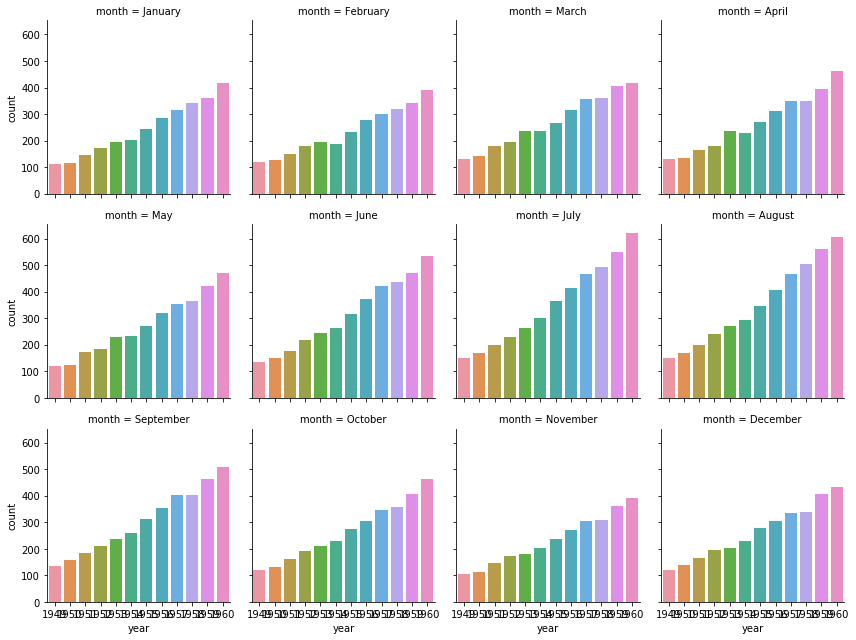

In [31]:
sns.catplot(x='year', y='count', col='month', 
            kind='bar', data=tidyflights, height=3, col_wrap=4);

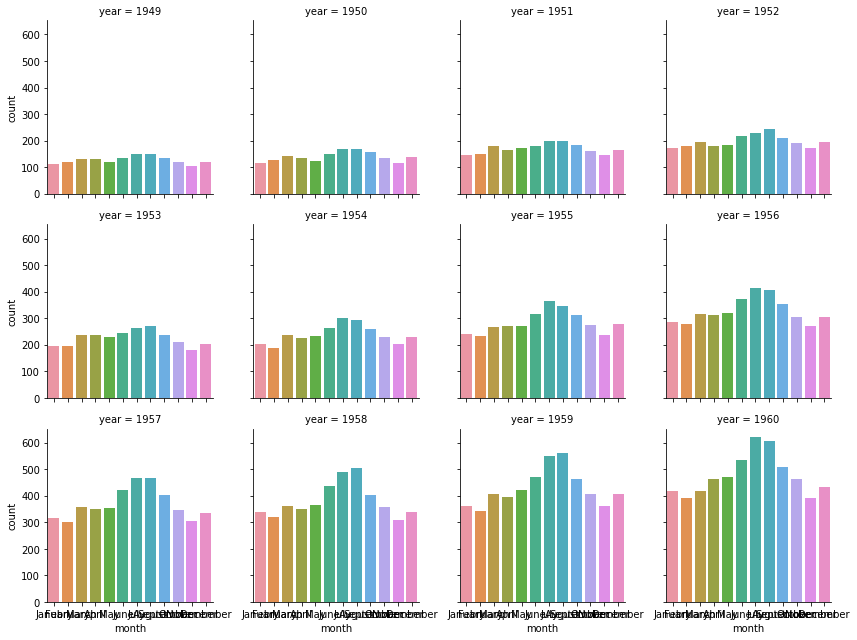

In [32]:
sns.catplot(x='month', y='count', col='year', 
            kind='bar', data=tidyflights, height=3,col_wrap=4);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



step 1: get the value counts for the product_names

step 2: get a list of the product names where the counts > 2900
> hint for step 2: value counts returns a pandas series, which can be filtered using a condition just like you would any column in a df

> all you need to groupby is the product name

> after that,  can access a particular column just like a regular df.. and  can call pandas methods/agg functions on that column as well
and then sorting will also work

In [46]:
order_products.head()
## need order_id and product_id -- especially the count of product ID over all history

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [47]:
order_products['product_id'].value_counts()
# nice that it's already sorted by value count

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
27966    142603
22935    117716
24964    113936
45007    109412
39275    105026
49683     99728
28204     92889
5876      91251
40706     88078
8277      87272
4920      86748
30391     85005
45066     83320
42265     80493
44632     79245
49235     79006
19057     78056
4605      76929
21616     75752
37646     75655
          ...  
6786          1
39522         1
46278         1
43098         1
34463         1
45273         1
47680         1
3426          1
13397         1
7712          1
49540         1
16790         1
44982         1
38045         1
42464         1
25888         1
48211         1
20223         1
28504         1
44986         1
41800         1
9818          1
15901         1
7198          1
33097         1
42235         1
5255          1
44495         1
36079         1
20759         1
Name: product_id, Length

In [0]:
order_products['product_id'].value_counts().head(2900)
# gets top 2900 products, not products with orders >=2900

In [50]:
order_products['product_id'].value_counts() >= 2900
# set of TRUE and FALSE

24852     True
13176     True
21137     True
21903     True
47209     True
47766     True
47626     True
16797     True
26209     True
27845     True
27966     True
22935     True
24964     True
45007     True
39275     True
49683     True
28204     True
5876      True
40706     True
8277      True
4920      True
30391     True
45066     True
42265     True
44632     True
49235     True
19057     True
4605      True
21616     True
37646     True
         ...  
6786     False
39522    False
46278    False
43098    False
34463    False
45273    False
47680    False
3426     False
13397    False
7712     False
49540    False
16790    False
44982    False
38045    False
42464    False
25888    False
48211    False
20223    False
28504    False
44986    False
41800    False
9818     False
15901    False
7198     False
33097    False
42235    False
5255     False
44495    False
36079    False
20759    False
Name: product_id, Length: 49685, dtype: bool

In [51]:
products_pop = (order_products['product_id'].value_counts() >= 2900)
products_pop.head(25)
# set of TRUE only ; shape= 49685
# it's a series, so no column names to index on

24852    True
13176    True
21137    True
21903    True
47209    True
47766    True
47626    True
16797    True
26209    True
27845    True
27966    True
22935    True
24964    True
45007    True
39275    True
49683    True
28204    True
5876     True
40706    True
8277     True
4920     True
30391    True
45066    True
42265    True
44632    True
Name: product_id, dtype: bool

In [0]:
#order_products[products_pop].head()
#Unalignable boolean Series provided as 'indexer (index of the boolean Series and of the indexed object do not match')

In [73]:
products_pop = order_products[order_products['product_id'].value_counts() >= 2900]
products_pop.head(25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

https://stackoverflow.com/questions/45352909/pandas-indexingerror-unalignable-boolean-series-provided-as-indexer

https://stackoverflow.com/questions/46374860/python-pandas-core-indexing-indexingerror-unalignable-boolean-series-key-provid?rq=1

In [77]:
df = products_pop.loc[:,products_pop.notnull().any(axis=0)]
print(df)

IndexingError: ignored

In [79]:
df = products_pop[products_pop.columns[products_pop.notnull().any(axis=0)]]

AttributeError: ignored

In [0]:
print(products_pop)

In [81]:
products_pop.dropna(axis=1, how='all')

ValueError: ignored

In [59]:
order_products.groupby('order_id')['order_id']
# 33819106 x 4

In [63]:
order_products[order_products['product_id'].isin(products_pop['product_id']

SyntaxError: ignored

In [62]:
pd.merge(order_products, products_pop, on='product_id',how='inner')
# 3958184 rows × 4 columns
# product_id are all '1'

,order_id,product_id,add_to_cart_order,reordered
0,1107,1,7,0
1,1107,1,7,0
2,1107,1,7,0
3,1107,1,7,0
4,1107,1,7,0
5,1107,1,7,0
6,1107,1,7,0
7,1107,1,7,0
8,1107,1,7,0
9,1107,1,7,0


In [0]:
orders = pd.read_csv('orders.csv')

In [0]:
orders.tail(25) #shouldn't need this except as a convenience

In [0]:
#order_products.groupby('order_id')['product_id'].value_count() 

In [67]:
order_products[order_products.product_id.isin(products_pop.product_id)]

AttributeError: ignored

In [71]:
order_products[order_products.product_id.isin(products_pop['product_id'])]


KeyError: ignored

In [0]:
top_products_ordered = order_products[order_products.product_id.isin(order_products.groupby('product_id')['reordered'].sum() > 2900)]

In [86]:
top_products_ordered.groupby('order_id')['product_id'].value_counts()

order_id  product_id
1107      1             1
5319      1             1
6695      1             1
7540      1             1
9228      1             1
9273      1             1
9696      1             1
11140     1             1
11485     1             1
12672     1             1
13668     1             1
14668     1             1
16132     1             1
18303     1             1
19479     1             1
19569     1             1
19879     1             1
19939     1             1
19989     1             1
23202     1             1
24367     1             1
24760     1             1
25365     1             1
26490     1             1
29334     1             1
33675     1             1
34340     1             1
38255     1             1
38944     1             1
43669     1             1
                       ..
3370662   1             1
3373906   1             1
3374850   1             1
3376434   1             1
3380472   1             1
3382691   1             1
3386788   1      

In [68]:
pd.merge(order_products, products_pop, on='product_id') #only gives product_id = 1

,order_id,product_id,add_to_cart_order,reordered
0,1107,1,7,0
1,1107,1,7,0
2,1107,1,7,0
3,1107,1,7,0
4,1107,1,7,0
5,1107,1,7,0
6,1107,1,7,0
7,1107,1,7,0
8,1107,1,7,0
9,1107,1,7,0


https://stackoverflow.com/questions/46374860/python-pandas-core-indexing-indexingerror-unalignable-boolean-series-key-provid?rq=1

The problem occurs because Pandas is trying to align the index of the Series with the column index of the DataFrame before masking with the Series boolean values. Since df has column labels 'A', 'B', 'C', 'D' and the Series has index labels 0, 1, 2, 3, Pandas is complaining that the labels are unalignable.

You probably don't want any index alignment. So instead, pass a NumPy boolean array instead of a Pandas Series:
```
mask = pd.Series(Data.columns.values).str.contains('ref', case=False).values
col_keep = Data.loc[:, mask]

```

The Series.values attribute returns a NumPy array. And since in future versions of Pandas, DataFrame.ix will be removed, use Data.loc instead of Data.ix here since we want boolean indexing.

In [0]:
mask = pd.Series(order_products['product_id'].value_counts() >= 2900)


In [0]:
import numpy as np

In [0]:
top_products_ordered = order_products[:,mask]

In [0]:
mask = pd.Series(products_pop.values==True)

In [93]:
top_products_ordered = order_products[:,mask]

TypeError: ignored

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####